In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
sprint_speed = []
ammo_clips = []
result = []

with open("zombies_data.csv", "r") as f:
    next(f)
    for line in f:
        parts = line.strip().split(",")

        ss = float(parts[0])
        ac = int(parts[1])
        res = int(parts[2])

        sprint_speed.append(ss)
        ammo_clips.append(ac)
        result.append(res)

print(sprint_speed)
print(ammo_clips)
print(result)
m=len(result)

[12.0, 14.5, 10.0, 18.0, 8.5, 15.0, 22.0, 11.0, 13.0, 20.5, 24.0, 16.0, 12.5, 28.0, 9.0, 25.0, 14.0, 19.0, 10.5, 26.5, 15.5, 17.0]
[0, 1, 2, 0, 4, 1, 0, 5, 2, 1, 2, 3, 0, 0, 6, 1, 4, 2, 2, 2, 5, 3]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]


In [20]:
ss=np.array(sprint_speed)
ac=np.array(ammo_clips)
ss_scaled = (ss - np.mean(ss)) / np.std(ss)
ac_scaled = (ac - np.mean(ac)) / np.std(ac)
x = np.column_stack((np.ones(m), ss_scaled, ac_scaled))
y = np.array(result)
y = y.reshape(-1,1)

print(x.shape)
print(y.shape)

(22, 3)
(22, 1)


In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [37]:
theta=np.array([[0.0],[0.0],[0.0]])
epochs=100
alpha=1
loss_history = []
for epoch in range(epochs):
    z = np.dot(x, theta)
    h = sigmoid(z)
    loss = - (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    loss_history.append(loss)
    gradient = np.dot(x.T, (h - y)) / m
    theta -= alpha * gradient

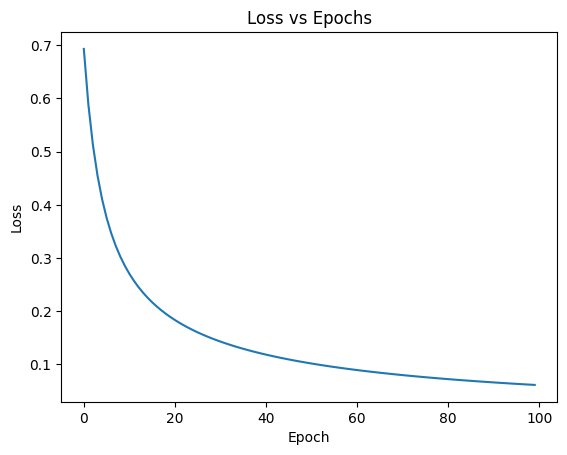

In [38]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

In [47]:
speed=25
clips=1
scaled_speed = (speed - np.mean(ss)) / np.std(ss)
scaled_clips = (clips - np.mean(ac)) / np.std(ac)

b=theta[0]
w1=theta[1]
w2=theta[2]
z = b + w1 * scaled_speed + w2 * scaled_clips
prob = sigmoid(z)
print(f"Probability of surviving with speed {speed} kmph and {clips} ammo clips: {prob[0]:.4f}")

Probability of surviving with speed 25 kmph and 1 ammo clips: 0.9974


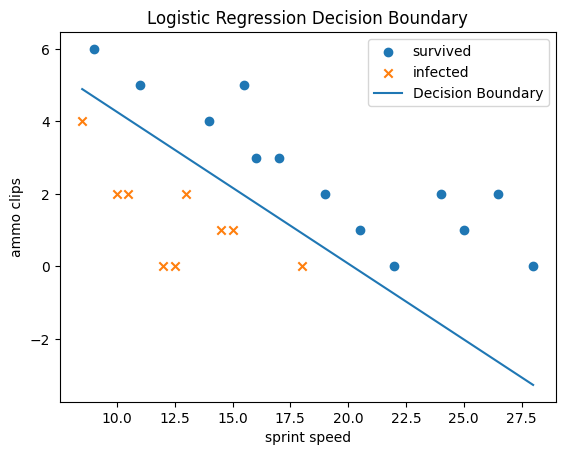

In [46]:
pos = y.flatten() == 1
neg = y.flatten() == 0

plt.scatter(ss[pos], ac[pos], marker='o', label='survived')
plt.scatter(ss[neg], ac[neg], marker='x', label='infected')

b = theta[0] - (theta[1] * np.mean(ss) / np.std(ss)) - (theta[2] * np.mean(ac) / np.std(ac))
w1 = theta[1]/np.std(ss)
w2 = theta[2]/np.std(ac)

x_vals = np.linspace(min(ss), max(ss), 100)
y_vals = -(b + w1 * x_vals) / w2

plt.plot(x_vals, y_vals, label="Decision Boundary")

plt.xlabel("sprint speed")
plt.ylabel("ammo clips")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()